## IMPORTING LIBRARYS

In [95]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing 
from mpl_toolkits.basemap import Basemap
import plotly.express as px
from xgboost import XGBRegressor

## GETTING DATA

In [96]:
pure_data= fetch_california_housing()  
df=pd.DataFrame(data=pure_data.data,columns=pure_data.feature_names) 
df['MedHouseVal']=pure_data.target 
df=df.sample(frac=1) 
df 
X=df.drop(columns=['MedHouseVal'],axis=1)
y=df['MedHouseVal'] 
df 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
14509,4.1429,12.0,5.308550,1.126394,528.0,1.962825,32.87,-117.21,2.544
14142,1.6318,19.0,4.403537,1.136656,2004.0,3.221865,32.75,-117.09,1.177
15054,4.8125,18.0,5.992405,1.017722,1021.0,2.584810,32.81,-116.83,2.105
6204,10.1248,25.0,7.545455,0.971074,1525.0,3.150826,34.06,-117.87,4.285
12661,2.8139,15.0,5.571932,1.002821,4769.0,3.363188,38.51,-121.42,0.904
...,...,...,...,...,...,...,...,...,...
14764,2.3000,23.0,4.305699,0.976684,1318.0,3.414508,32.58,-117.10,1.208
4320,2.8021,47.0,3.765690,1.142259,921.0,1.926778,34.09,-118.35,2.806
3219,2.9375,19.0,5.236287,1.029536,850.0,3.586498,36.33,-119.67,0.817
9986,3.5208,33.0,5.036585,1.065041,539.0,2.191057,38.59,-122.58,1.958


In [97]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14509,4.1429,12.0,5.308550,1.126394,528.0,1.962825,32.87,-117.21
14142,1.6318,19.0,4.403537,1.136656,2004.0,3.221865,32.75,-117.09
15054,4.8125,18.0,5.992405,1.017722,1021.0,2.584810,32.81,-116.83
6204,10.1248,25.0,7.545455,0.971074,1525.0,3.150826,34.06,-117.87
12661,2.8139,15.0,5.571932,1.002821,4769.0,3.363188,38.51,-121.42
...,...,...,...,...,...,...,...,...
14764,2.3000,23.0,4.305699,0.976684,1318.0,3.414508,32.58,-117.10
4320,2.8021,47.0,3.765690,1.142259,921.0,1.926778,34.09,-118.35
3219,2.9375,19.0,5.236287,1.029536,850.0,3.586498,36.33,-119.67
9986,3.5208,33.0,5.036585,1.065041,539.0,2.191057,38.59,-122.58


In [98]:
y

14509    2.544
14142    1.177
15054    2.105
6204     4.285
12661    0.904
         ...  
14764    1.208
4320     2.806
3219     0.817
9986     1.958
5938     1.842
Name: MedHouseVal, Length: 20640, dtype: float64

In [99]:
df = pd.concat([X,y],axis=1)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
14509,4.1429,12.0,5.308550,1.126394,528.0,1.962825,32.87,-117.21,2.544
14142,1.6318,19.0,4.403537,1.136656,2004.0,3.221865,32.75,-117.09,1.177
15054,4.8125,18.0,5.992405,1.017722,1021.0,2.584810,32.81,-116.83,2.105
6204,10.1248,25.0,7.545455,0.971074,1525.0,3.150826,34.06,-117.87,4.285
12661,2.8139,15.0,5.571932,1.002821,4769.0,3.363188,38.51,-121.42,0.904
...,...,...,...,...,...,...,...,...,...
14764,2.3000,23.0,4.305699,0.976684,1318.0,3.414508,32.58,-117.10,1.208
4320,2.8021,47.0,3.765690,1.142259,921.0,1.926778,34.09,-118.35,2.806
3219,2.9375,19.0,5.236287,1.029536,850.0,3.586498,36.33,-119.67,0.817
9986,3.5208,33.0,5.036585,1.065041,539.0,2.191057,38.59,-122.58,1.958


## VISUALIZING DATA

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20640 entries, 14509 to 5938
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


In [101]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
14509,4.1429,12.0,5.308550,1.126394,528.0,1.962825,32.87,-117.21,2.544
14142,1.6318,19.0,4.403537,1.136656,2004.0,3.221865,32.75,-117.09,1.177
15054,4.8125,18.0,5.992405,1.017722,1021.0,2.584810,32.81,-116.83,2.105
6204,10.1248,25.0,7.545455,0.971074,1525.0,3.150826,34.06,-117.87,4.285
12661,2.8139,15.0,5.571932,1.002821,4769.0,3.363188,38.51,-121.42,0.904


In [102]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [103]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


### distribution of target values

/tmp/ipykernel_57176/2744617800.py:1: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



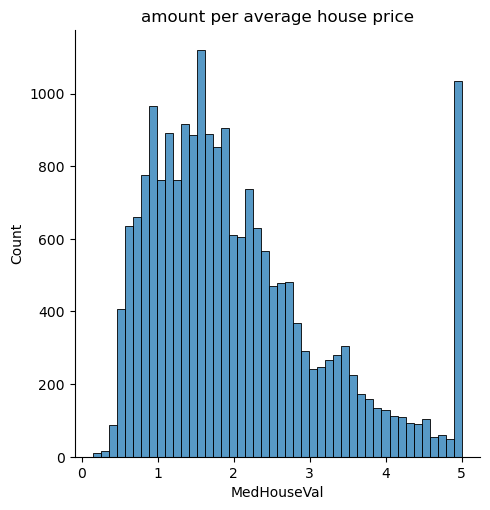

In [104]:
fig=sns.displot(y,palette='pastel') 
plt.title('amount per average house price')  
plt.show() 

### showing heat map of correlation matrix 

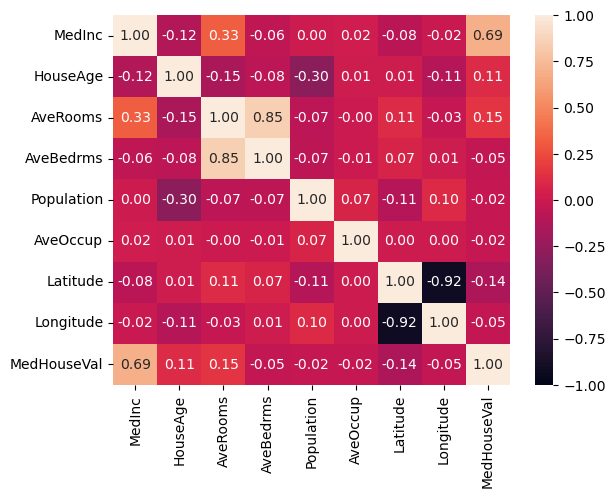

In [105]:
sns.heatmap(data=df.corr(),annot=True, fmt=".2f",mask=None,vmin=-1.0, vmax=1.0) 
plt.show()

### showing average house price per region

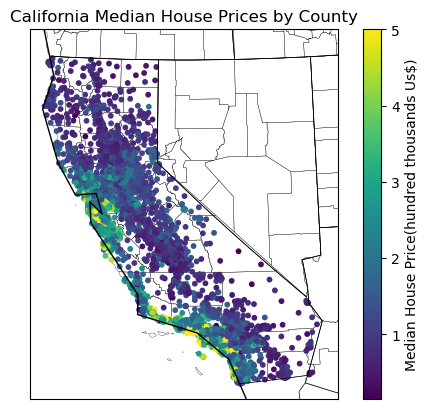

In [106]:
m = Basemap(
    projection='lcc',
    resolution='c',
    lat_0=37.5, lon_0=-119,
    width=1E6, height=1.2E6
)

# Draw county boundaries
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawcounties(linewidth=0.2) 
#m.drawcounties(facecolor=df['MedHouseVal']) 

# Scatter plot median house prices on the map
# Replace 'lat' and 'lon' with your latitude and longitude columns
m.scatter(df['Longitude'], df['Latitude'], latlon=True, c=df['MedHouseVal'], cmap='viridis', marker='o', s=10)

# Add colorbar
plt.colorbar(label='Median House Price(hundred thousands Us$)')

# Add title
plt.title('California Median House Prices by County')

# Show the map
plt.show()

#### interactive

### reducing dimensions to see scatterplot with tsne

In [107]:
from sklearn.manifold import TSNE
df_tsne_sample=df.sample(frac=0.2) 
X_tsne_sample=df_tsne_sample.drop(columns=['MedHouseVal']) 
y_tsne_sample=df_tsne_sample['MedHouseVal']
tsne=TSNE(n_components=1,random_state=200)  #we apply the random state so that its not different everytime we restar 
array_red=tsne.fit_transform(X_tsne_sample) #applying dimensional reductioon on array  
df_tsne=pd.DataFrame(array_red,columns=['COMP1']) # making it into a pandas dataframe for easier viewing 
df_tsne = df_tsne.reset_index(drop=True)
y_tsne_sample = y_tsne_sample.reset_index(drop=True)
df_tsne

,COMP1
0,-89.872482
1,64.637344
2,104.185005
3,52.262039
4,74.775627
...,...
4123,33.210423
4124,-94.025658
4125,37.082066
4126,-99.715019


In [108]:
df_tsne['target']=y_tsne_sample
df_tsne

,COMP1,target
0,-89.872482,5.00001
1,64.637344,1.03500
2,104.185005,2.14800
3,52.262039,2.58300
4,74.775627,0.69700
...,...,...
4123,33.210423,1.90600
4124,-94.025658,0.33200
4125,37.082066,4.22200
4126,-99.715019,1.89000


In [109]:
array_red

array([[-89.87248 ],
       [ 64.637344],
       [104.185005],
       ...,
       [ 37.082066],
       [-99.71502 ],
       [-31.491177]], dtype=float32)

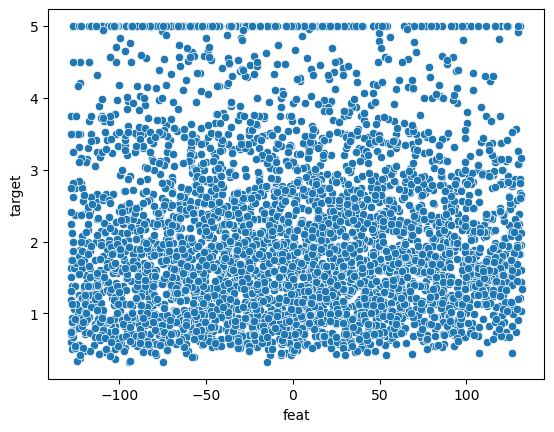

In [110]:
sns.scatterplot(data=df_tsne,x='COMP1',y='target') 
plt.xlabel("feat") 
plt.ylabel("target") 
plt.show() 

### using dimensiality reduction with PCA

In [111]:
from sklearn.decomposition import PCA   
df_pca_sample=df.sample(frac=0.2) 
X_pca_sample=df_pca_sample.drop(columns=['MedHouseVal']) 
y_pca_sample=df_pca_sample['MedHouseVal']
pca=PCA(n_components=1) 
arrayFeat=pca.fit_transform(X_pca_sample) 
df_pca=pd.DataFrame(arrayFeat,columns=['COMP1']) # making it into a pandas dataframe for easier viewing 
df_pca = df_pca.reset_index(drop=True)
y_pca_sample = y_pca_sample.reset_index(drop=True)
df_pca 

,COMP1
0,210.052832
1,-464.064405
2,-1401.889489
3,-732.988088
4,45.035075
...,...
4123,1839.072712
4124,-267.999464
4125,296.039411
4126,1507.999270


In [112]:
df_pca['target']=y_pca_sample 
df_pca

,COMP1,target
0,210.052832,1.18500
1,-464.064405,3.14700
2,-1401.889489,0.42500
3,-732.988088,1.95700
4,45.035075,2.76400
...,...,...
4123,1839.072712,3.27700
4124,-267.999464,3.53600
4125,296.039411,1.81900
4126,1507.999270,5.00001


<Axes: xlabel='COMP1', ylabel='target'>

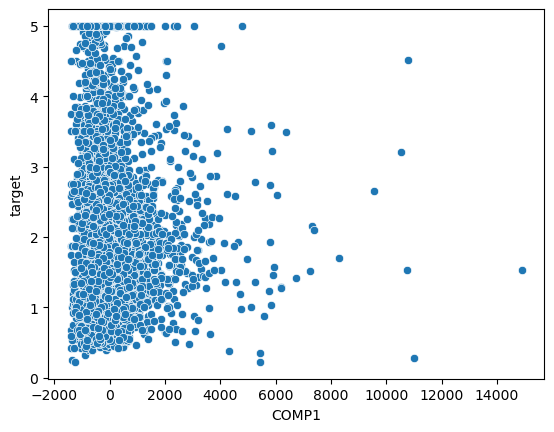

In [113]:
sns.scatterplot(data=df_pca,x='COMP1',y='target')

## SPLITTING DATA

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=32)

In [115]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
18487,5.1519,15.0,5.067019,0.964727,1582.0,2.790123,37.01,-121.58
15184,2.4459,17.0,3.824879,1.039855,2098.0,2.533816,32.97,-117.10
280,6.2838,34.0,6.948718,1.000000,442.0,2.266667,37.80,-122.18
18437,3.7844,4.0,3.958796,1.228209,1213.0,1.922345,37.25,-121.87
9742,5.2203,18.0,7.191781,1.050228,751.0,3.429224,36.81,-121.60
...,...,...,...,...,...,...,...,...
11426,4.4148,17.0,5.856305,0.997067,952.0,2.791789,33.70,-117.98
62,0.9011,50.0,6.229508,1.557377,377.0,3.090164,37.81,-122.29
3773,6.1359,31.0,6.040541,0.981081,914.0,2.470270,34.17,-118.42
2439,2.2727,10.0,4.934028,1.076389,1443.0,2.505208,36.59,-119.61


In [116]:
y_train

18487    2.647
15184    0.858
280      3.182
18437    1.839
9742     2.865
         ...  
11426    2.392
62       0.861
3773     3.597
2439     0.927
13052    1.169
Name: MedHouseVal, Length: 16512, dtype: float64

In [117]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14370,3.2361,38.0,5.066308,1.041219,972.0,1.741935,32.72,-117.23
384,2.0227,44.0,5.102326,1.111628,609.0,2.832558,37.74,-122.16
5516,6.2673,38.0,5.516667,0.972222,374.0,2.077778,33.97,-118.39
7577,2.1211,26.0,4.508475,1.271186,252.0,4.271186,33.89,-118.22
18924,4.4397,16.0,5.615016,1.000000,1764.0,2.817891,38.06,-122.17
...,...,...,...,...,...,...,...,...
5563,4.4636,42.0,3.658046,0.887931,1203.0,3.456897,33.90,-118.29
13824,2.0136,13.0,5.309524,1.101190,2225.0,2.648810,34.49,-117.17
14005,4.7396,52.0,7.098246,1.056140,649.0,2.277193,32.76,-117.18
15848,4.2672,23.0,5.251252,1.059265,2818.0,2.352254,37.74,-122.44


In [118]:
y_test

14370    5.00001
384      1.03100
5516     3.57200
7577     1.38100
18924    1.87100
          ...   
5563     1.62000
13824    0.94100
14005    4.41700
15848    3.91900
19118    2.00600
Name: MedHouseVal, Length: 4128, dtype: float64

## CREATING MODEL 

In [119]:
from sklearn.linear_model import LinearRegression  
from sklearn.tree import DecisionTreeRegressor


In [120]:
# model=DecisionTreeRegressor() 

In [131]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split 
from sklearn.datasets import load_diabetes 
from sklearn.decomposition import PCA  
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.neighbors import RadiusNeighborsRegressor 
from sklearn.cross_decomposition import PLSCanonical,PLSRegression
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor 
def getModels(): 
   return {"LINEAR REGRESSION":LinearRegression(), 
    "RANDOM FOREST":RandomForestRegressor(max_depth=6),
    "ADA BOOST":AdaBoostRegressor(), 
    "DECISION TREE":DecisionTreeRegressor(), 
    "SGD":make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3)), 
    "KNN":KNeighborsRegressor(),
    "EXTRA TREES":ExtraTreesRegressor(random_state=0,max_depth=6),
    "GRADIENT BOOST":GradientBoostingRegressor(random_state=0) , 
    "XGREGRESSOR":XGBRegressor(max_depth=6)}

## TRAINING MODEL

In [132]:
# model.fit(X_train,y_train)

In [133]:
models=getModels() 
for i in models.keys(): 
    models[i].fit(X_train,y_train)

""" scores =cross_val_score(getModel(),X,y,cv=10) 
print("R2: ",np.absolute(np.mean(scores))) """ 

print('models loaded') 
models

models loaded


{'LINEAR REGRESSION': LinearRegression(),
 'RANDOM FOREST': RandomForestRegressor(max_depth=6),
 'ADA BOOST': AdaBoostRegressor(),
 'DECISION TREE': DecisionTreeRegressor(),
 'SGD': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('sgdregressor', SGDRegressor())]),
 'KNN': KNeighborsRegressor(),
 'EXTRA TREES': ExtraTreesRegressor(max_depth=6, random_state=0),
 'GRADIENT BOOST': GradientBoostingRegressor(random_state=0),
 'XGREGRESSOR': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_l

## PREDICTING

In [134]:
# y_pred =model.predict(X_test) 
# y_pred

In [135]:
scores={} 
predictions={} 
rmse={}  
mse={} 
metrics={}
from sklearn.metrics import mean_squared_error 
for i in models.keys():  
    predictions[i]=models[i].predict(X_test) 
    rmse[i]=mean_squared_error(y_test,predictions[i],squared=True)  
    mse[i]=mean_squared_error(y_test,predictions[i],squared=False) 
    metrics[i]={'MSE':mse[i],'RMSE':rmse[i]}
    scores[i]=rmse[i]


""" scores =cross_val_score(getModel(),X,y,cv=10) 
print("R2: ",np.absolute(np.mean(scores))) """ 


metrics 

{'LINEAR REGRESSION': {'MSE': 0.7191894725830453, 'RMSE': 0.5172334974742789},
 'RANDOM FOREST': {'MSE': 0.6453090730889216, 'RMSE': 0.4164237998108832},
 'ADA BOOST': {'MSE': 0.8854033044875111, 'RMSE': 0.7839390115974044},
 'DECISION TREE': {'MSE': 0.7493018897064843, 'RMSE': 0.5614533219177082},
 'SGD': {'MSE': 27.438009830922947, 'RMSE': 752.8443834818243},
 'KNN': {'MSE': 1.0561250944692058, 'RMSE': 1.115400215167589},
 'EXTRA TREES': {'MSE': 0.7517705393120668, 'RMSE': 0.5651589437775558},
 'GRADIENT BOOST': {'MSE': 0.5377980058716266, 'RMSE': 0.28922669511949817},
 'XGREGRESSOR': {'MSE': 0.4731585328578789, 'RMSE': 0.22387899721622045}}

In [136]:
# from sklearn.metrics import mean_squared_error 
# rmse=mean_squared_error(y_test,y_pred,squared=True) 
# rmse

### scatterplot

In [137]:
# plt.scatter(y_test, y_pred,edgecolor='black')
# plt.xlabel("True Values")
# plt.ylabel("Predictions")
# plt.title("True Values vs Predictions in Regression")
# plt.show()

['LINEAR REGRESSION', 'RANDOM FOREST', 'ADA BOOST', 'DECISION TREE', 'SGD', 'KNN', 'EXTRA TREES', 'GRADIENT BOOST', 'XGREGRESSOR']
9


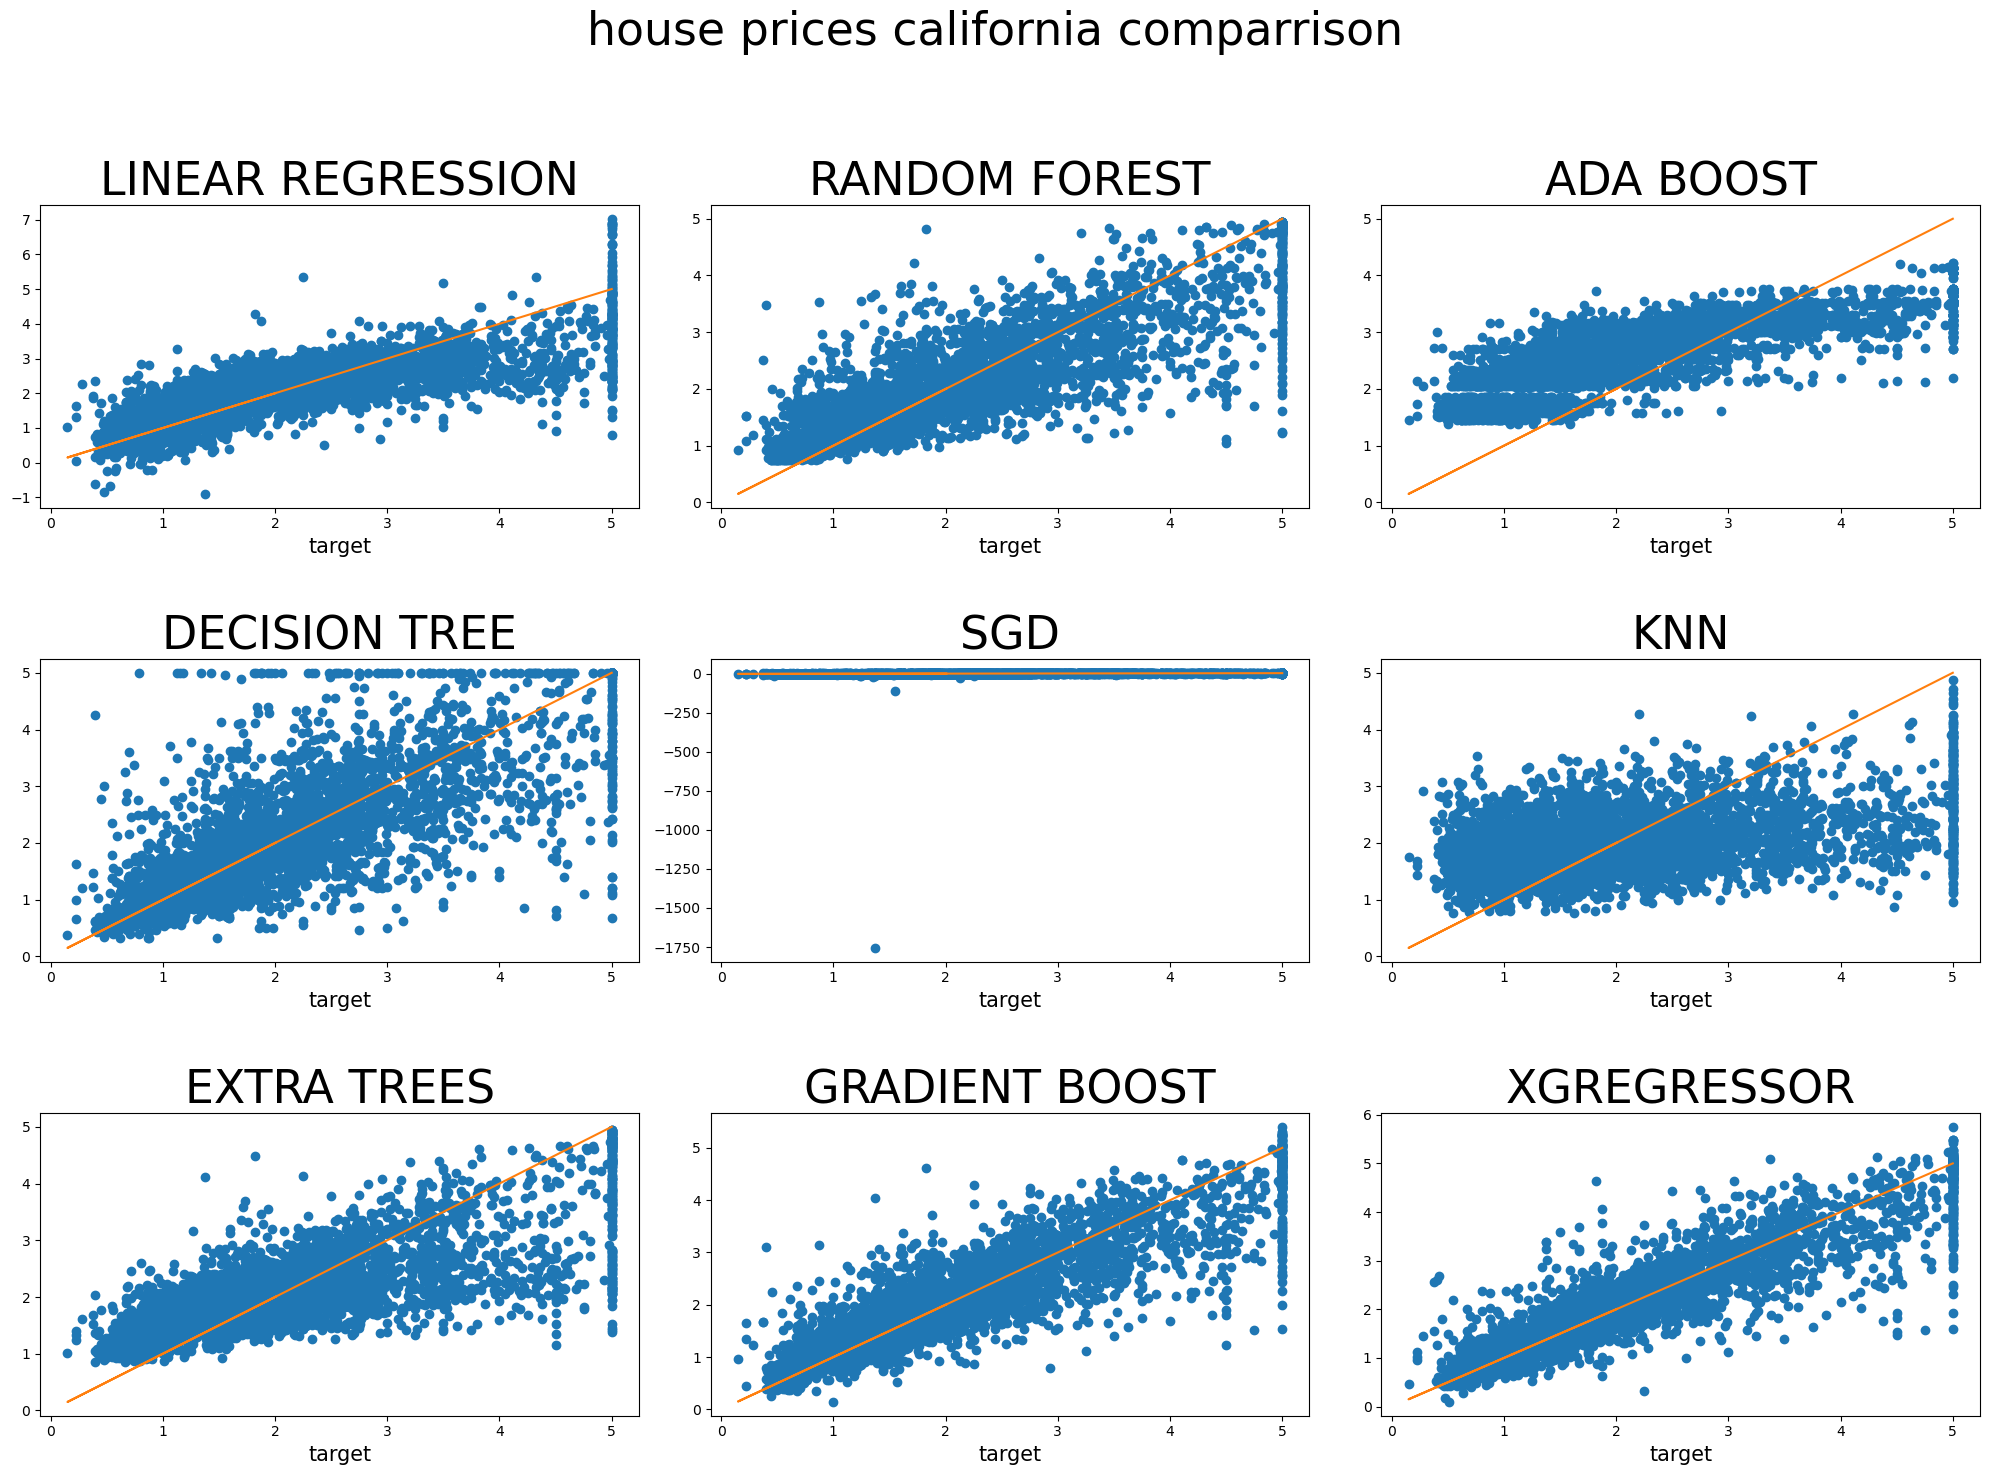

In [144]:
auxdic=scores
auxdic=list(auxdic.items())

fig,ax =plt.subplots(3,3) 
fig.suptitle("house prices california comparrison",size=33)   
fig.set_figwidth(20)
fig.set_figheight(15)
dimX=ax.shape[0] 
dimY=ax.shape[1] 
predictionsList= []
for i in predictions.keys():
    predictionsList.append(predictions[i]) 
predictionsList=np.transpose(predictionsList) 
predictionsList=pd.DataFrame(predictionsList,columns=models.keys())  

#print(predictions)
#predictions=np.transpose(pd.DataFrame(predictions)) 
m_keys=list(models.keys()) 
print(m_keys) 
print(len(m_keys))
for i in range(dimX): 
    for j in range(dimY) : 
        oneDIndex=(i*dimX)+j  
        ax[i,j].plot(y_test,predictions[m_keys[oneDIndex]],"o")  
        ax[i,j].set_title(m_keys[oneDIndex],size=33) 
        ax[i,j].set_xlabel("target",size=15) 
        ax[i,j].set_xbound(lower=0,upper=5)  
        m,b=np.polyfit(y_test,y_test,deg=1)
        ax[i,j].plot(y_test,m*y_test+b)
        # centerish=ax[i,j].get_xbound()[1]/2
        # centerishY=ax[i,j].get_ybound()[1]/2
        # ax[i,j].text(x=centerish-13,y=-centerishY/2.5,s=("R2:%f" % float(auxdic[oneDIndex][1])),ma="center")
fig.align_labels() 
fig.tight_layout()
fig.subplots_adjust(top=0.85,hspace=0.5)

In [142]:
# residuals = y_test - y_pred
# plt.hist(residuals, bins=50)
# plt.xlabel("Residuals")
# plt.ylabel("Frequency")
# plt.title("Distribution of Residuals in Regression")
# plt.show()

In [143]:
# plt.plot(y_test, label='True Values')
# plt.plot(y_pred, label='Predictions')
# plt.xlabel("Sample Index")
# plt.ylabel("Values")
# plt.title("True Values vs Predictions Across Samples")
# plt.legend()
# plt.show()